# Teste ára cáculo de Fitness

In [2]:
#Util
import operator
import math
import random
import numpy as np
from numpy import linspace,sin,pi,int16
import matplotlib.pyplot as plt
%matplotlib inline

# Genetic Programming
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

# Audio
import librosa
import librosa.display
import thinkdsp
import thinkplot

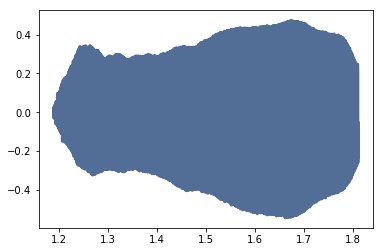

In [22]:
wave = thinkdsp.read_wave('sounds/92002__jcveliz__violin-origional.wav')
target = wave.segment(1.18995, 0.62)
target.plot()
target.make_audio()

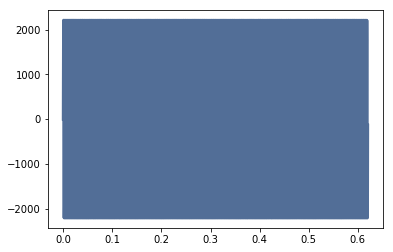

In [136]:
points = target.make_spectrum().peaks()[:1]
signal = 0
for p in points:
    signal += thinkdsp.SinSignal(amp=p[0],freq=p[1])
candidate0 = signal.make_wave(duration=target.duration, framerate=target.framerate)
candidate0.plot()
candidate0.make_audio()

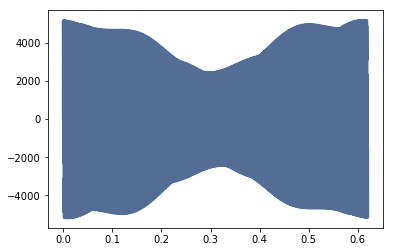

In [137]:
points = target.make_spectrum().peaks()[:10]
signal = 0
for p in points:
    signal += thinkdsp.SinSignal(amp=p[0],freq=p[1])
candidate1 = signal.make_wave(duration=target.duration, framerate=target.framerate)
candidate1.plot()
candidate1.make_audio()

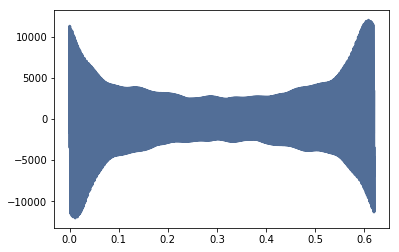

In [69]:
points = target.make_spectrum().peaks()[:100]
signal = 0
for p in points:
    signal += thinkdsp.SinSignal(amp=p[0],freq=p[1])
candidate2 = signal.make_wave(duration=target.duration, framerate=target.framerate)
candidate2.plot()
candidate2.make_audio()

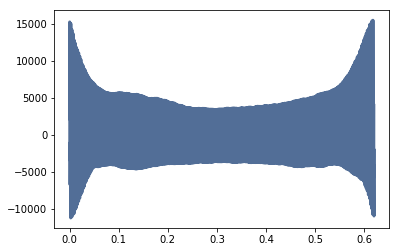

In [70]:
points = target.make_spectrum().peaks()[:400]
signal = 0
for p in points:
    if signal == 0:
        signal = thinkdsp.CosSignal(amp=p[0],freq=p[1])
    else:
        signal = thinkdsp.SumSignal(signal, thinkdsp.SinSignal(amp=p[0],freq=p[1]))
candidate3 = signal.make_wave(duration=target.duration, framerate=target.framerate)
candidate3.plot()
candidate3.make_audio()

## FITNESS 1
1. Gera o espectrograma das ondas com tamanho de janelas iguais  
2. Compara os espectros gerados  

In [50]:
duration = target.duration
framerate = target.framerate
win_size =  0.05
length = int(framerate*win_size/duration)
length

3556

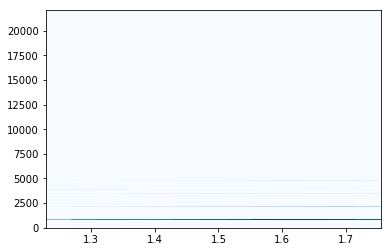

In [138]:
target_spectrogram = target.make_spectrogram(length)
target_spectrogram.plot()

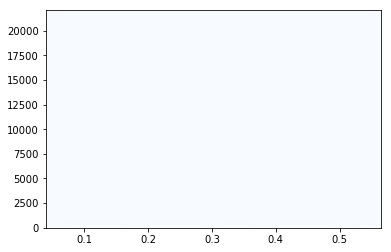

In [139]:
candidate0_spectrogram = candidate0.make_spectrogram(length)
candidate0_spectrogram.plot()

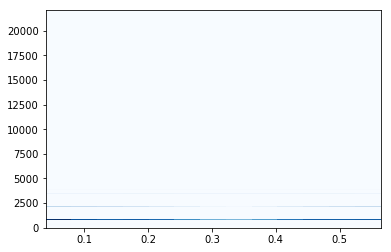

In [72]:
candidate1_spectrogram = candidate1.make_spectrogram(length)
candidate1_spectrogram.plot()

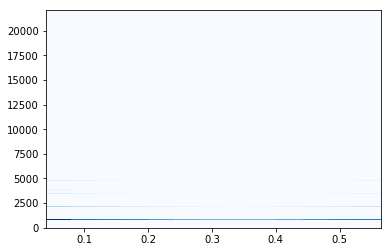

In [73]:
candidate2_spectrogram = candidate2.make_spectrogram(length)
candidate2_spectrogram.plot()

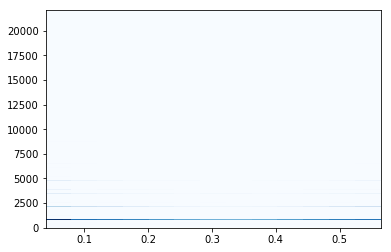

In [74]:
candidate3_spectrogram = candidate3.make_spectrogram(length)
candidate3_spectrogram.plot()

In [154]:
#Extrai os valores de de amp e frequencia das janelas dos spectrogramas
target_values = np.array([s.peaks() for s in target_spectrogram.spec_map.values()])
candidate0_values = np.array([s.peaks() for s in candidate0_spectrogram.spec_map.values()])
candidate1_values = np.array([s.peaks() for s in candidate1_spectrogram.spec_map.values()])
candidate2_values = np.array([s.peaks() for s in candidate2_spectrogram.spec_map.values()])
candidate3_values = np.array([s.peaks() for s in candidate3_spectrogram.spec_map.values()])

In [236]:
def normal_squared_error(target_values, candidate_values):
    error = ((target_values - candidate_values)**2)
    amp_error = np.reshape((error[:,:,0]),(-1,1))
    freq_error = np.reshape((error[:,:,1]),(-1,1))
    amp_error = amp_error/max(amp_error)
    freq_error = freq_error/max(freq_error)
    
    return amp_error.mean(), freq_error.mean()

In [238]:
amp, freq = normal_squared_error(target_values,candidate0_values)
fitness = (100*amp + 10*freq)/110
fitness

0.0038668966367896569

In [240]:
amp, freq = normal_squared_error(target_values,candidate1_values)
fitness = (100*amp + 10*freq)/110
fitness

0.0041939311588040842

In [241]:
amp, freq = normal_squared_error(target_values,candidate2_values)
fitness = (100*amp + 10*freq)/110
fitness

0.004105072139623701

In [242]:
amp, freq = normal_squared_error(target_values,candidate3_values)
fitness = (100*amp + 10*freq)/110
fitness

0.0044071661614298839

###### ((target_values - candidate0_values)**2)[:,:,1]

In [107]:
target_values - candidate2_values

array([[ -2.70208011e+06,  -4.46456693e+02],
       [ -2.16068995e+06,   4.46456693e+02],
       [ -1.95324820e+06,   4.46456693e+02],
       [ -1.78236115e+06,   0.00000000e+00],
       [ -1.59545097e+06,   4.46456693e+02],
       [ -1.43484586e+06,   4.46456693e+02],
       [ -1.40401342e+06,   4.46456693e+02],
       [ -1.40085539e+06,   4.46456693e+02],
       [ -1.39677840e+06,   4.46456693e+02],
       [ -1.53576523e+06,   4.46456693e+02],
       [ -1.68985488e+06,  -4.46456693e+02],
       [ -1.86341709e+06,  -4.46456693e+02],
       [ -2.08617393e+06,   0.00000000e+00],
       [ -2.35403494e+06,  -4.46456693e+02]])

In [108]:
target_values - candidate3_values

array([[ -2.63638464e+06,  -4.46456693e+02],
       [ -1.99652617e+06,   4.46456693e+02],
       [ -2.07932243e+06,   4.46456693e+02],
       [ -2.09135491e+06,   4.46456693e+02],
       [ -2.03844228e+06,   4.46456693e+02],
       [ -1.99045714e+06,   4.46456693e+02],
       [ -1.97800917e+06,   4.46456693e+02],
       [ -1.95300093e+06,   4.46456693e+02],
       [ -1.92115596e+06,   4.46456693e+02],
       [ -1.84142257e+06,   4.46456693e+02],
       [ -1.73206853e+06,   0.00000000e+00],
       [ -1.84296333e+06,  -4.46456693e+02],
       [ -1.92456986e+06,  -4.46456693e+02],
       [ -2.29805307e+06,  -4.46456693e+02]])